In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/')
import psix

In [84]:
psix_object = psix.Psix()
psix_object.process_rnaseq(
        'data/preprocess/tables/SE_counts_filtered.tab.gz',
        'data/preprocess/tables/constitutive_introns_filtered.tab.gz',
        'data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

Obtaining psi tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1067/1067 [00:46<00:00, 23.02it/s]


Successfully processed RNA-seq data


In [99]:
psix_object.compute_psix_scores(latent='data/preprocess/tables/pc5_rd.tab.gz', n_jobs=25, 
                                n_random_exons=2000, n_neighbors=100,
                               turbo='~/psix_project/psix/psix/psix_turbo/')

 61%|██████    | 646/1067 [00:00<00:00, 6456.82it/s]

cell-cell metric not found. Computing metric...


100%|██████████| 1067/1067 [00:00<00:00, 6284.14it/s]

Successfully computed cell-cell metric
Computing Psix score in 2087 exons



100%|██████████| 2087/2087 [00:10<00:00, 190.73it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [00:24<00:00,  1.03it/s]


Successfully estimated p-values


In [86]:
psix_results = psix_object.psix_results
psix_results.head()

,psix_score,pvals,qvals
Mapt_1,3.063552,0.0005,0.00161
Ndrg4_1,2.803551,0.0005,0.00161
Dbn1_1,2.322582,0.0005,0.00161
Gabrg2_1,1.937772,0.0005,0.00161
Ncam1_6,1.528102,0.0005,0.00161


100%|██████████| 3760/3760 [00:27<00:00, 138.93it/s]


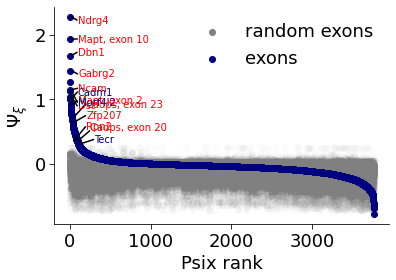

In [28]:
psix_results = psix_object.psix_results.copy()
psix_results['bins'] = ['']*len(psix_results.index)

for mean in psix_object.bins.keys():
    for var in psix_object.bins[mean].keys():
        for exon in psix_object.bins[mean][var]:
            psix_results.loc[exon, 'bins'] = mean +'_' + var
            
fig = plt.figure()
ax  = plt.subplot(1,1,1)
i = 1

ax.scatter([100], [-0.05], c='gray', label='random exons')

for mean_var in tqdm(psix_results.sort_values('psix_score')[::-1].bins):
    mean = mean_var[:6]
    var = mean_var[7:]
    subset = np.random.choice(psix_object.random_scores[mean][var], 50, replace=False)
    ax.scatter([i]*50, subset, c='gray', alpha=0.02)
    i += 1


plt.text(100, psix_results.loc['Mapt_1'].psix_score-0.05, 'Mapt, exon 10', c='red')   
plt.plot([20, 90], [psix_results.loc['Mapt_1'].psix_score, psix_results.loc['Mapt_1'].psix_score],c='black')

plt.text(100, psix_results.loc['Ndrg4_1'].psix_score-0.1, 'Ndrg4', c='red')   
plt.plot([20, 90], [psix_results.loc['Ndrg4_1'].psix_score, psix_results.loc['Ndrg4_1'].psix_score-0.05],c='black')

plt.text(100, psix_results.loc['Dbn1_1'].psix_score, 'Dbn1', c='red')   
plt.plot([20, 90], [psix_results.loc['Dbn1_1'].psix_score, psix_results.loc['Dbn1_1'].psix_score+0.05],c='black')

plt.text(104, psix_results.loc['Mapt_3'].psix_score, 'Mapt, exon 2', c='red')    
plt.plot([24, 94], [psix_results.loc['Mapt_3'].psix_score, psix_results.loc['Mapt_3'].psix_score+0.05],c='black')

plt.text(105, psix_results.loc['Gabrg2_1'].psix_score-0.1, 'Gabrg2', c='red')   
plt.plot([25, 95], [psix_results.loc['Gabrg2_1'].psix_score, psix_results.loc['Gabrg2_1'].psix_score-0.05],c='black')

plt.text(104, psix_results.loc['Cadm1_10'].psix_score+0.05, 'Cadm1', c='navy')    
plt.plot([24, 94], [psix_results.loc['Cadm1_10'].psix_score, psix_results.loc['Cadm1_10'].psix_score+0.1],c='black')

plt.text(105, psix_results.loc['Ncam1_6'].psix_score-0.03, 'Ncam', c='red')   
plt.plot([25, 95], [psix_results.loc['Ncam1_6'].psix_score, psix_results.loc['Ncam1_6'].psix_score+0.02],c='black')

plt.text(104, psix_results.loc['Dst_5'].psix_score-0.19, 'Dst', c='red')    
plt.plot([24, 94], [psix_results.loc['Dst_5'].psix_score, psix_results.loc['Dst_5'].psix_score-0.14],c='black')

plt.text(105, psix_results.loc['Morf4l2_7'].psix_score-0.22, 'Morf4l2', c='navy')   
plt.plot([25, 95], [psix_results.loc['Morf4l2_7'].psix_score, psix_results.loc['Morf4l2_7'].psix_score-0.17],c='black')

plt.text(305, psix_results.loc['Tecr_6'].psix_score+0.02, 'Tecr', c='navy')   
plt.plot([125, 295], [psix_results.loc['Tecr_6'].psix_score, psix_results.loc['Tecr_6'].psix_score+0.07],c='black')

plt.text(205, psix_results.loc['Rpn2_3'].psix_score+0.15, 'Rpn2', c='red')   
plt.plot([65, 195], [psix_results.loc['Rpn2_3'].psix_score, psix_results.loc['Rpn2_3'].psix_score+0.2],c='black')

plt.text(255, psix_results.loc['Cadps_2'].psix_score+0.15, 'Cadps, exon 20', c='red')   
plt.plot([105, 245], [psix_results.loc['Cadps_2'].psix_score, psix_results.loc['Cadps_2'].psix_score+0.15],c='black')

plt.text(205, psix_results.loc['Cadps_7'].psix_score+0.15, 'Cadps, exon 23', c='red')   
plt.plot([55, 195], [psix_results.loc['Cadps_7'].psix_score, psix_results.loc['Cadps_7'].psix_score+0.2],c='black')

plt.text(205, psix_results.loc['Zfp207_1'].psix_score+0.05, 'Zfp207', c='red')   
plt.plot([55, 195], [psix_results.loc['Zfp207_1'].psix_score, psix_results.loc['Zfp207_1'].psix_score+0.1],c='black')

ax.scatter(np.arange(1, len(psix_results.index)+1), psix_results.sort_values('psix_score')[::-1].psix_score, c = 'navy',
          label='exons')
    
plt.xlabel('Psix rank', fontsize=18)
plt.ylabel(r'$\Psi_{\xi}$', fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(labelsize=18, length=5)
plt.legend(frameon=False, fontsize=18)

# plt.savefig('plots/psix_scores.png', bbox_inches='tight', res=100)
# plt.savefig('plots/psix_scores.svg', bbox_inches='tight')
# plt.savefig('plots/psix_scores.pdf', bbox_inches='tight')

In [100]:
psix_object.compute_neighbors_psi(latent='data/preprocess/tables/pc5_rd.tab.gz', n_neighbors=10)

Successfully computed neighbors


In [101]:
np.sum((psix_results.psix_score > 0) & (psix_results.qvals <= 0.05))

801

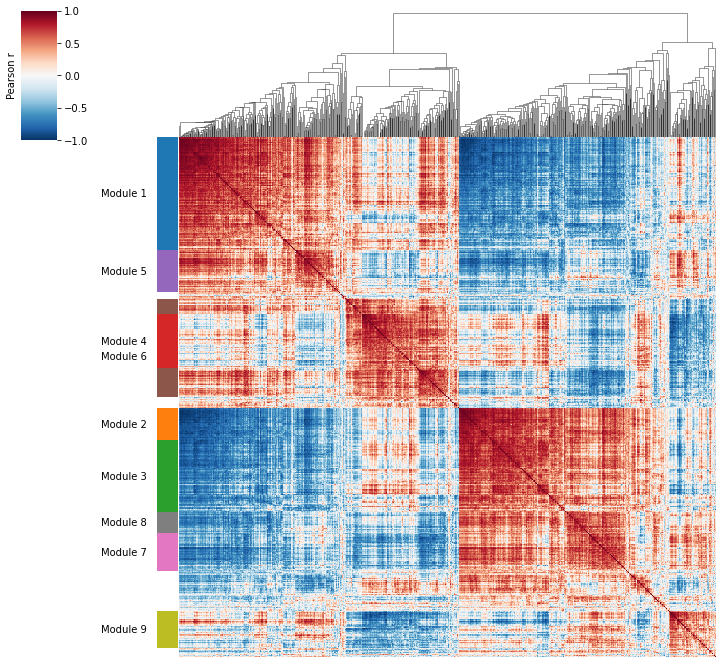

In [102]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *

background_psi = psix_object.adata.uns['neighbors_psi'].mask(psix_object.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=30, fdr_threshold=None, z_threshold=0.3, core_only=False)

aver = local_correlation_plot(
            background_psi.loc[exon_list].T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False
)

In [103]:
modules_neuron_diversity = bwow[0]
modules_exons = pd.read_csv('psix_object/modules.tab.gz', sep='\t', index_col=0).Module

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
shared = modules_neuron_diversity.index & modules_exons.index

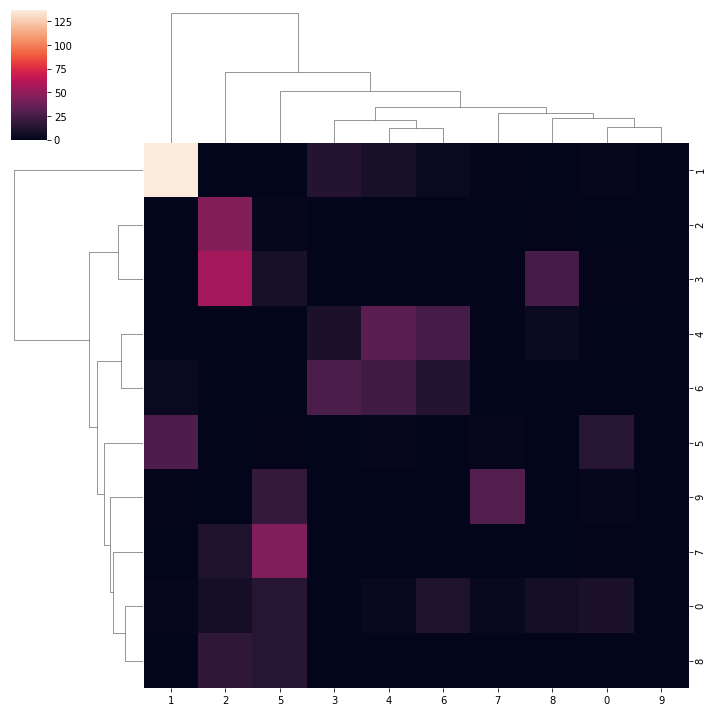

In [106]:
sns.clustermap(confusion_matrix(np.array(modules_neuron_diversity.loc[shared]),
                 np.array(modules_exons.loc[shared])))

(2.0, 4.0)

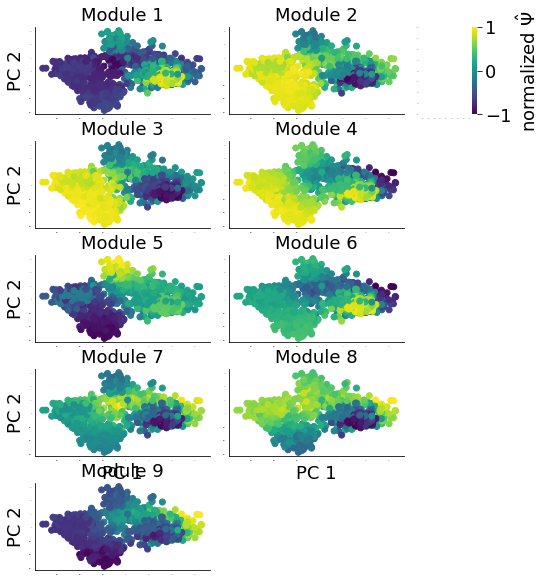

In [107]:
from scipy.stats import zscore
from itertools import product
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 10))
gs = GridSpec(5,12)
gs.update(wspace=1, hspace=0.3)

ax_positions = list(product(range(5), range(2)))

background_psi = psix_object.adata.uns['neighbors_psi'].T

for mod in range(1,10):
    
    mad_df = pd.DataFrame()
    for exon in bwow[0].index[bwow[0]==mod]:
        mad_df[exon] = zscore(background_psi.loc[exon])
    mad_df.index= psix_object.adata.uns['psi'].index
    
    x, y = ax_positions[mod-1]
    
    ax = fig.add_subplot(gs[x,(5*y):(5*y)+5])

    sc = ax.scatter(psix_object.latent.PC_2, 
                    psix_object.latent.PC_3, 
                    c=mad_df.mean(axis=1), cmap='viridis')
    
    
    plt.title('Module '+str(mod), fontsize=18)
    if x == 3:
        plt.xlabel('PC 1', fontsize=18)
    if y == 0:
        plt.ylabel('PC 2', fontsize=18)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(labelsize=0, length=0)
    ax.grid(False)
#     plt.show()
ax = fig.add_subplot(gs[0,10:12])
ax.grid(False)
sc = ax.scatter([0, 0], [0, 0], c=[-1, 1])
cb = plt.colorbar(sc, shrink = 1, aspect=20)
cb.set_label(label='normalized $\hat{\Psi}$',size=18)
cb.ax.tick_params(labelsize=18, length=5)
cb.outline.set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(labelsize=0, length=0)
ax.set_xlim((2, 4))
ax.set_ylim((2, 4))

(2.0, 4.0)

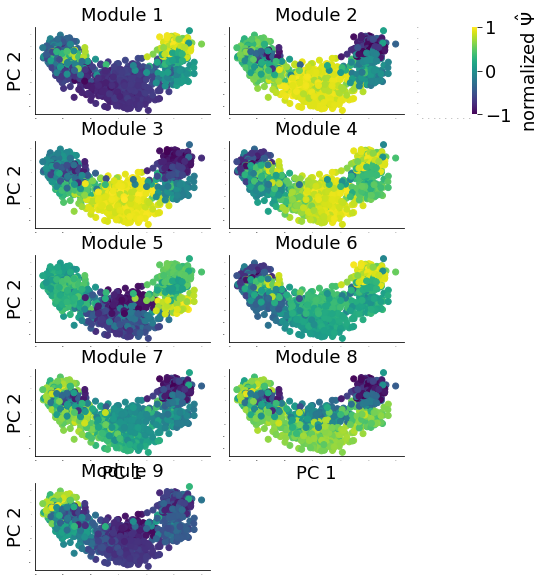

In [108]:
from scipy.stats import zscore
from itertools import product
from matplotlib.gridspec import GridSpec

latent2 = pd.read_csv('data/preprocess/tables/pc2_rd.tab.gz', sep='\t', index_col=0)

fig = plt.figure(figsize=(8, 10))
gs = GridSpec(5,12)
gs.update(wspace=1, hspace=0.3)

ax_positions = list(product(range(5), range(2)))

background_psi = psix_object.adata.uns['neighbors_psi'].T

for mod in range(1,10):
    
    mad_df = pd.DataFrame()
    for exon in bwow[0].index[bwow[0]==mod]:
        mad_df[exon] = zscore(background_psi.loc[exon])
    mad_df.index= psix_object.adata.uns['psi'].index
    
    x, y = ax_positions[mod-1]
    
    ax = fig.add_subplot(gs[x,(5*y):(5*y)+5])

    sc = ax.scatter(latent2.PC_1, 
                    latent2.PC_2, 
                    c=mad_df.mean(axis=1), cmap='viridis')
    
    
    plt.title('Module '+str(mod), fontsize=18)
    if x == 3:
        plt.xlabel('PC 1', fontsize=18)
    if y == 0:
        plt.ylabel('PC 2', fontsize=18)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(labelsize=0, length=0)
    ax.grid(False)
#     plt.show()
ax = fig.add_subplot(gs[0,10:12])
ax.grid(False)
sc = ax.scatter([0, 0], [0, 0], c=[-1, 1])
cb = plt.colorbar(sc, shrink = 1, aspect=20)
cb.set_label(label='normalized $\hat{\Psi}$',size=18)
cb.ax.tick_params(labelsize=18, length=5)
cb.outline.set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(labelsize=0, length=0)
ax.set_xlim((2, 4))
ax.set_ylim((2, 4))

In [98]:
pd.DataFrame(bwow[0]).to_csv('psix_object/modules_pc5.tab.gz', sep='\t', index=True, header=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
psix_results = pd.read_csv('psix_object/psix_results.tab.gz', sep='\t', index_col=0)
psi = psix_object.adata.uns['psi']

pc = PCA(5)
pca = pc.fit_transform(KNNImputer().fit_transform(psi[psix_results.loc[psix_results.qvals <= 0.05].index].T).T)
plt.scatter(pca.T[0], pca.T[1], c=psi['Mapt_1'])




In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,5)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4])
ax.scatter(pca.T[0], pca.T[1], c=colores)
ax.tick_params(labelsize=18, length=5)
ax.set_title('$\Psi$ space', fontsize=18)
ax.set_xlabel('PC 1', fontsize=18)
ax.set_ylabel('PC 2', fontsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.scatter([-1], [0], c='darkred', label='E13.5')
ax_2.scatter([0], [0], c='darkorange', label='E15.5')
ax_2.scatter([0], [0], c='forestgreen', label='E18.5')
ax_2.scatter([0], [0], c='skyblue', label='P1')
ax_2.scatter([0], [0], c='indigo', label='P7')
ax_2.scatter([0], [0], c='navy', label='P90')
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["bottom"].set_visible(False)
ax_2.spines["left"].set_visible(False)
ax_2.tick_params(labelsize=0, length=0, which='both')
ax_2.set_xlim([2, 3])
ax_2.set_ylim([2, 3])
ax_2.legend(frameon=False, fontsize=14, loc='center left')

In [ ]:
plt.scatter(psix_object.adata.uns['latent'].PC_1, psix_object.adata.uns['latent'].PC_2, 
                    c=KNNImputer().fit_transform(psi[psix_results.loc[psix_results.qvals <= 0.05].index]['Clta_1'])

In [ ]:
plt.scatter(KNNImputer().fit_transform(psi[psix_results.loc[psix_results.qvals <= 0.05].index].T)[200], 
           KNNImputer().fit_transform(psi[psix_results.index].T)[200])

In [ ]:
plt.scatter(KNNImputer().fit_transform(psi[psix_results.loc[psix_results.qvals <= 0.05].index]).T[200], 
           KNNImputer().fit_transform(psi[psix_results.index]).T[200])